# Orthogonal Polynomial Approximation with Chebyshev Polynomials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate as pn
eps = np.finfo(float).eps

###### Chebyshev Polynomials are defined $$T_n(x) = \cos(n\arccos(x))\qquad x\in[-1,1]$$

###### Generate the plot displayed in the image below

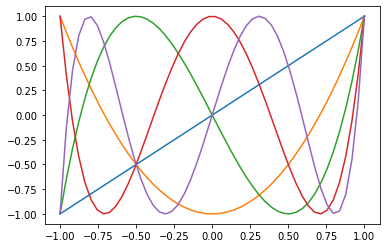

In [2]:
# insert code here
#n = np.arange(1,6)
x = np.linspace(-1,1)
for n in range(1,6):
    Tn = np.cos(n*np.arccos(x))
    plt.plot(x,Tn);

###### ![Chebyshev Polynomials](cheb_polynomials.png)

###### The zeros of the Chebyshev polynomials may be computed as follows:
* $T_1(\theta) = \cos(\theta) = 0$ when $\theta = \frac\pi2$ so $x = \cos(\frac\pi2) = 0$
* $T_2(\theta) = \cos(2\theta) = 0$ when $2\theta = \frac\pi2, \frac{3\pi}2$ or $\theta = \frac\pi4, \frac{3\pi}4$ so $x_0 = \cos(\frac\pi4) = \frac{\sqrt{2}}{2}$, $x_1 = \cos(\frac{3\pi}4) = -\frac{\sqrt{2}}{2}$
* $T_3(\theta) = \cos(3\theta) = 0$ when $3\theta = \frac\pi2, \frac{3\pi}2, \frac{5\pi}2$ or $\theta = \frac\pi6, \frac{3\pi}6$, $\frac{5\pi}6$ so $x_0 = \cos(\frac\pi6) = \frac{\sqrt{3}}{2}$, $x_1 = \cos(\frac{\pi}2) = 0$, and $\cos(\frac{5\pi}6) = -\frac{\sqrt{3}}{2}$

###### So in general
$$T_n(\theta) = \cos(n\theta) = 0\implies n\theta = \frac{2k-1}{2}\pi \implies \theta = \frac{2k-1}{2n}\pi$$
Hence, the zeros of the Chebyshev polynomials are
$$x_k = \cos\left[\frac{2k-1}{2n}\pi\right]$$
for $k = 1, 2, \ldots, n$ and $n > 1$.

###### Generate the Chebyshev nodes and call them $x_k$

In [3]:
n = 22
# insert code here
k = np.arange(n)
xk = np.cos((2*k+1)*np.pi/(2*n)) # replace [] with formula for Chebyshev nodes 
print(f'Node(s) for T{n} = {xk}')

Node(s) for T22 = [ 0.99745211  0.97714687  0.93694972  0.87767899  0.80054124  0.70710678
  0.59927767  0.47924899  0.34946418  0.21256529  0.07133918 -0.07133918
 -0.21256529 -0.34946418 -0.47924899 -0.59927767 -0.70710678 -0.80054124
 -0.87767899 -0.93694972 -0.97714687 -0.99745211]


###### Create a function that returns the Chebyshev nodes 

In [4]:
def cheb(n):
    # insert code here
    k = np.arange(n)
    xk = np.cos((2*k+1)*np.pi/(2*n))
    return xk # replace [] with formula for Chebyshev nodes 

###### The zeros of the Chebyshev polynomial are projections of the evenly-spaced points on the top-half of the unit circle down to the interval $[-1,1]$. Hence, the zeros of the Chebyshev polynomial cluster near the boundaries.

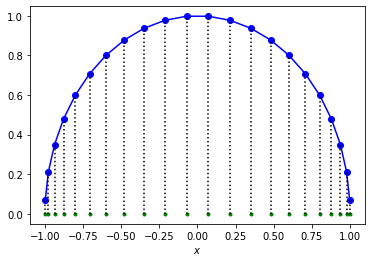

In [5]:
# Run this cell after the cheb(n) function is complete
n = 22
xk = cheb(n)
plt.plot(xk,0*xk,'g.',xk,np.sqrt(1-xk**2),'bo-')
for z in xk:
    plt.plot([z,z],[0,np.sqrt(1-z**2)],'k:')
plt.xlabel('$x$');

###### The critical points of $T_n(x)$ are $x_k^*=\cos\left(\frac{k}{n}\pi\right)$ so $$T_n(x^*) = \cos\left(n\frac{k}{n}\pi\right) = \cos\left(\frac{k}\pi\right) = (-1)^k$$ 

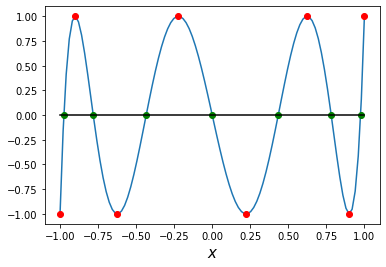

In [6]:
# Run this cell after the cheb(n) function is complete
x = np.linspace(-1,1,100)
n = 7
xk = cheb(n)
k = np.arange(n+1)
xc = np.cos(k*np.pi/n)
plt.plot(x,np.cos(n*np.arccos(x)),xc,np.cos(n*np.arccos(xc)),'ro',xk,0*xk,'go',[-1,1],[0,0],'k')
plt.xlabel('$x$',size=15);

###### The Chebyshev polynomials have the minimax property $$\frac1{2^{n-1}} = \max_{x\in[-1,1]}|\tilde{T}_n(x)|\le \max_{x\in[-1,1]}|p_n(x)|$$ for all monic polynomials $p_n(x)$ of degree $n$.

###### The inequality $$\Pi_{k=1}^n\left| x - x_k \right|\le\frac1{2^{n-1}}$$ reveals that using the Chebyshev nodes for interpolation reduces the error.

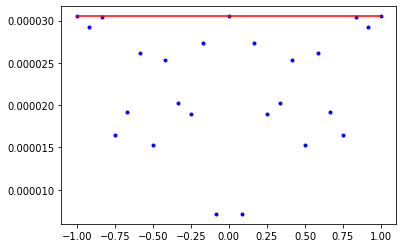

In [7]:
# Run this cell after the cheb(n) function is complete
n = 16
xk = cheb(n)
xx = np.linspace(-1,1,25)
L = 1/2**(n-1)
p = []
for x in xx:
    p.append(np.prod(np.fabs(x-xk)))
plt.plot(xx,p,'b.',[-1, 1],[L,L],'r');

###### The minimax property implies that using $n+1$ Chebyshev nodes, $\left\{x_k\right\}_{k=0}^n$, reduces the interpolation error by a factor of $\frac1{2^n}$,
$$\left|f(x) - p_n(x)\right| \le \max_{x\in[-1,1]}\frac{f^{n+1}(x)}{(n+1)!}\Pi_{k=0}^n\left|x-x_k\right|\le\max_{x\in[-1,1]}\frac{f^{n+1}(x)}{2^n(n+1)!}$$

###### Interpolate $$f(x) = \arctan(7x)\qquad x\in[-1,1]$$ with $n = 13$
* evenly spaced nodes
* Chebyshev nodes
Plot the results and report the max absolute error over the interval

###### Evenly-spaced Nodes

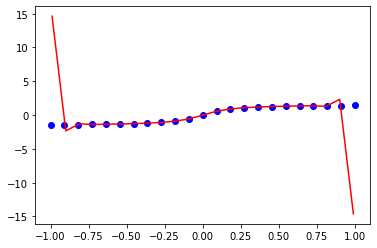

In [13]:
n = 23
x = np.linspace(-1,1,n)
f = np.arctan(7*x)
xi = np.linspace(-0.99, 0.99,23)
fi = pn(x,f,xi) #interpolant
plt.plot(x,f,'bo',xi,fi,'r');
# insert code here

###### Chebyshev Nodes

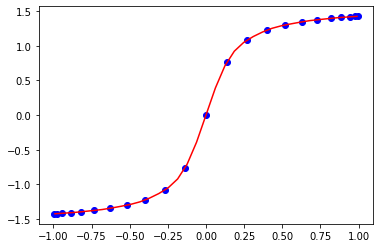

In [15]:
n = 23
xk = cheb(n)
f = np.arctan(7*xk)
xi = np.linspace(-0.99, 0.99,33)
fi = pn(xk,f,xi) #interpolant
plt.plot(xk,f,'bo',xi,fi,'r');
# insert code here

###### Reduce the Degree of the Approximating (Maclaurin) Polynomial for $f(x) = \frac{sin(x)}x$ on $[-1,1]$.

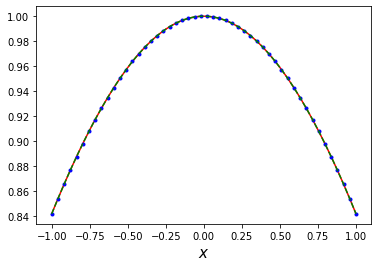

In [16]:
x = np.linspace(-1,1)
f = np.sin(x)/x
p6 = -x**6/5040+x**4/120-x**2/6+1
p4 = (9/1120)*x**4-(4477/26880)*x**2+(161281/161280)
plt.plot(x,f,'red',x,p6,'b.',x,p4,'g--')
plt.xlabel('$x$',size=15);

In [17]:
e6 = np.max(np.fabs(f-p6))
e4 = np.max(np.fabs(f-p4))
print(f'max|f-p6| = {e6}')
print(f'max|f-p4| = {e4}')

max|f-p6| = 2.7308396425285153e-06
max|f-p4| = 1.85729724824224e-05


###### Recall $$\lim_{x\to0}\frac{\sin(x)}x=1$$ Notice that $$p_6(0)=1$$ and $$p_4(0) = \frac{161281}{161280}$$

In [18]:
print(f'error at x = 0 is {1/161280}')

error at x = 0 is 6.200396825396825e-06


###### Alternative formulation for Chebyshev nodes

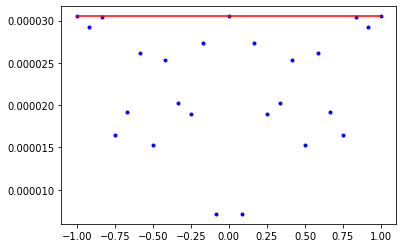

In [19]:
n = 16
k = np.arange(n-1,-n,-2)
xk = np.sin(np.pi*k/(2*n))
xx = np.linspace(-1,1,25)
L = 1/2**(n-1)
p = []
for x in xx:
    p.append(np.prod(np.fabs(x-xk)))
plt.plot(xx,p,'b.',[-1, 1],[L,L],'r');